In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x_train = np.arange(0, 100, 0.5)
y_train = np.sin(x_train)

x_test = np.arange(100, 200, 0.5)
y_test = np.sin(x_test)


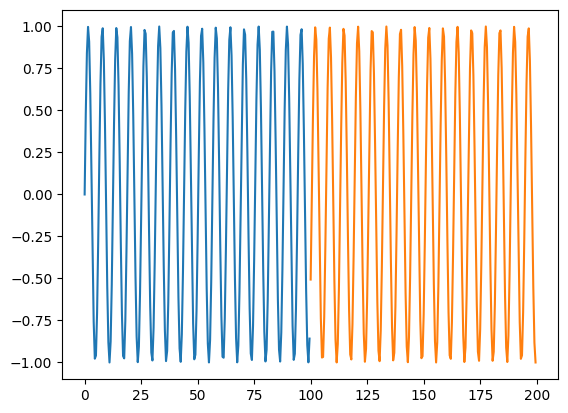

In [4]:
plt.plot(x_train, y_train)
plt.plot(x_test, y_test)

plt.show()

In [5]:
n_features = 1

train_series = y_train.reshape(len(y_train), n_features)
test_series = y_test.reshape(len(y_test), n_features)

In [8]:

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

n_input = 10
n_features = 1
train_generator = TimeseriesGenerator(train_series, train_series, length=n_input, batch_size=8)
test_generator = TimeseriesGenerator(test_series, test_series, length=n_input, batch_size=8)

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [10]:
n_neurons = 10
n_features = 1
model = Sequential()
model.add(LSTM(n_neurons, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(train_generator, epochs=300, verbose=0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


In [11]:
test_predictions = model.predict(test_generator)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


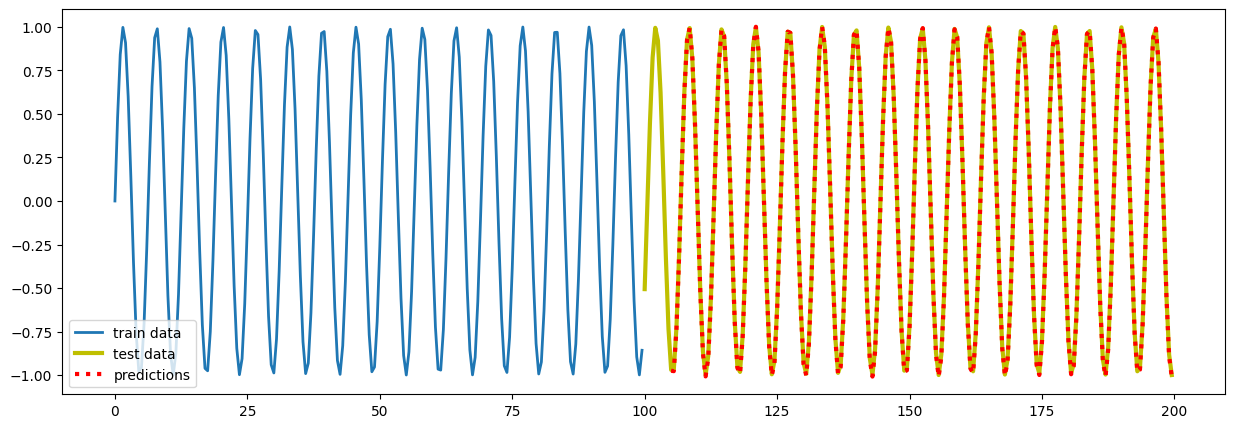

In [14]:
x = np.arange(105,200,0.5)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train,y_train, lw=2, label='train data')
ax.plot(x_test,y_test, lw=3, c='y', label='test data')
ax.plot(x,test_predictions, lw=3, c='r',linestyle = ':', label='predictions')
ax.legend(loc="lower left")
plt.show()


In [ ]:
# Now make a Sine wave with 3rd harmonic + 5th harmonic